<a href="https://colab.research.google.com/github/liateg/loan-default-classifier-ml/blob/main/loan-default.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project: Loan Default Classifier**
This project aims to build a machine learning model that predicts whether a borrower is likely to default on a loan. The dataset includes information about borrowers' financial and demographic attributes. The goal is to analyze the data, preprocess it, and train classification models to identify patterns that can help lenders assess risk and make informed decisions.

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [29]:
df=pd.read_csv('/content/sample_data/Loan_default.csv')
df.head(100)

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,4JQAOGI6A8,42,30200,182868,517,119,3,16.87,24,0.51,Bachelor's,Part-time,Single,Yes,Yes,Auto,Yes,0
96,D51F6APQ5Y,62,25274,134289,701,91,1,13.01,24,0.57,Master's,Unemployed,Married,No,No,Business,Yes,0
97,O367DPWKN4,58,55299,37681,361,54,1,24.10,36,0.30,Bachelor's,Part-time,Single,No,Yes,Auto,Yes,0
98,9VNZFS3GD3,46,100459,174884,578,52,3,22.29,24,0.69,Bachelor's,Full-time,Married,Yes,No,Auto,No,0


In [7]:
df.shape

(21561, 18)

In [8]:
X=df.drop(columns=['LoanID','Default'],axis=1)
Y=df['Default']

In [9]:
X.head()
print(X.shape)

(21561, 16)


In [10]:
Y.head()
print(Y.shape)

(21561,)


In [11]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21561 entries, 0 to 21560
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             21561 non-null  int64  
 1   Income          21561 non-null  int64  
 2   LoanAmount      21561 non-null  int64  
 3   CreditScore     21561 non-null  int64  
 4   MonthsEmployed  21561 non-null  int64  
 5   NumCreditLines  21561 non-null  int64  
 6   InterestRate    21561 non-null  float64
 7   LoanTerm        21561 non-null  int64  
 8   DTIRatio        21561 non-null  float64
 9   Education       21561 non-null  object 
 10  EmploymentType  21561 non-null  object 
 11  MaritalStatus   21561 non-null  object 
 12  HasMortgage     21561 non-null  object 
 13  HasDependents   21561 non-null  object 
 14  LoanPurpose     21561 non-null  object 
 15  HasCoSigner     21560 non-null  object 
dtypes: float64(2), int64(7), object(7)
memory usage: 2.6+ MB


In [12]:
#seprate the number columns and categorical columns in X
num_cols=X.select_dtypes(include=np.number).columns
cat_cols=X.select_dtypes(exclude=np.number).columns

In [13]:
num_cols

Index(['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
       'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio'],
      dtype='object')

In [14]:
Xnum=X[num_cols]
Xcat=X[cat_cols]

In [15]:
Xnum.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio
0,56,85994,50587,520,80,4,15.23,36,0.44
1,69,50432,124440,458,15,1,4.81,60,0.68
2,46,84208,129188,451,26,3,21.17,24,0.31
3,32,31713,44799,743,0,3,7.07,24,0.23
4,60,20437,9139,633,8,4,6.51,48,0.73


In [16]:
Xcat.head()

,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes
1,Master's,Full-time,Married,No,No,Other,Yes
2,Master's,Unemployed,Divorced,Yes,Yes,Auto,No
3,High School,Full-time,Married,No,No,Business,No
4,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No


In [17]:
Xcat_encoded = pd.get_dummies(Xcat, drop_first=True).astype(int)


In [18]:
Xcat_encoded.head()

,Education_High School,Education_Master's,Education_PhD,EmploymentType_Part-time,EmploymentType_Self-employed,EmploymentType_Unemployed,MaritalStatus_Married,MaritalStatus_Single,HasMortgage_Yes,HasDependents_Yes,LoanPurpose_Business,LoanPurpose_E,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other,HasCoSigner_Yes
0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1
1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1
2,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0


In [19]:
X=pd.concat([Xnum,Xcat_encoded],axis=1)

In [20]:
X.isna().sum()

,0
Age,0
Income,0
LoanAmount,0
CreditScore,0
MonthsEmployed,0
NumCreditLines,0
InterestRate,0
LoanTerm,0
DTIRatio,0
Education_High School,0


In [21]:
scaler=StandardScaler()
X[num_cols]=scaler.fit_transform(X[num_cols])

In [54]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

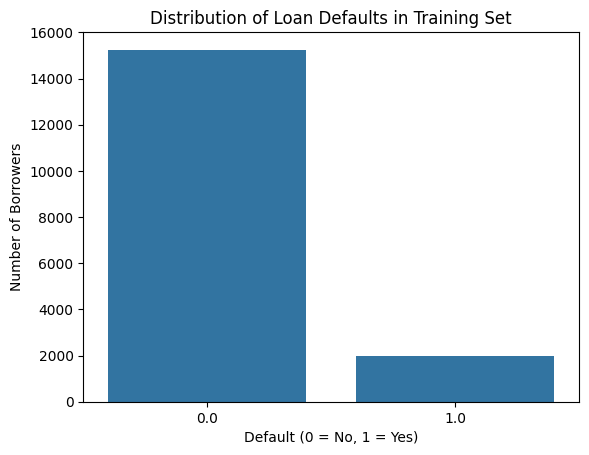

In [26]:

# Plot class distribution
sns.countplot(x=Y_train)
plt.title("Distribution of Loan Defaults in Training Set")
plt.xlabel("Default (0 = No, 1 = Yes)")
plt.ylabel("Number of Borrowers")
plt.show()
#the target is very unbalanced


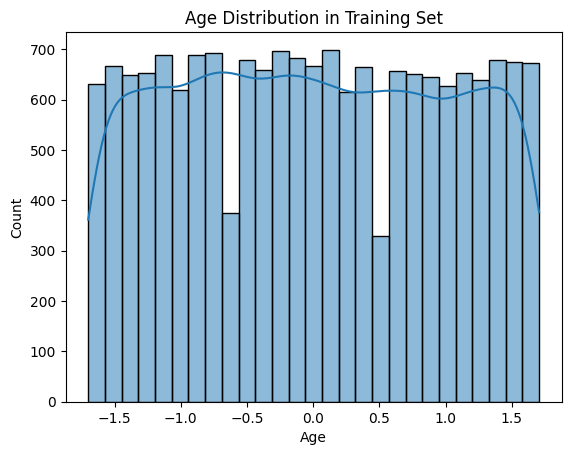

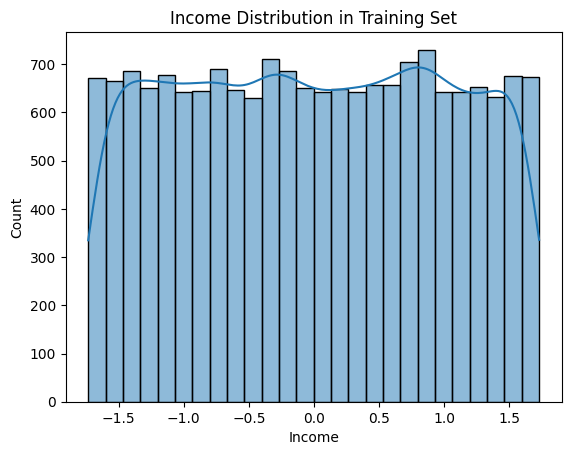

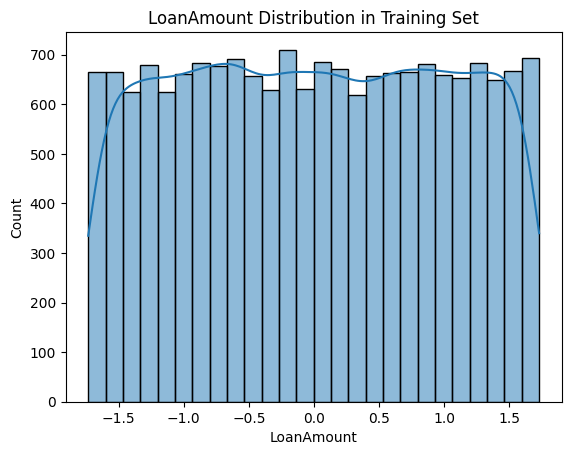

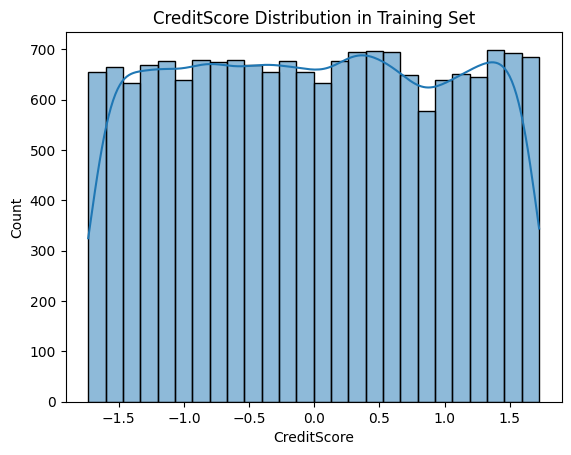

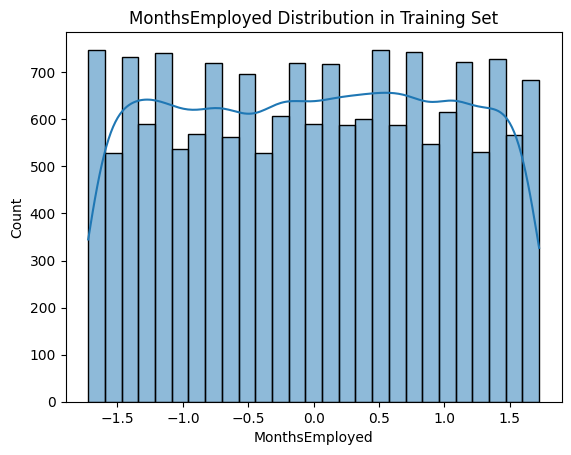

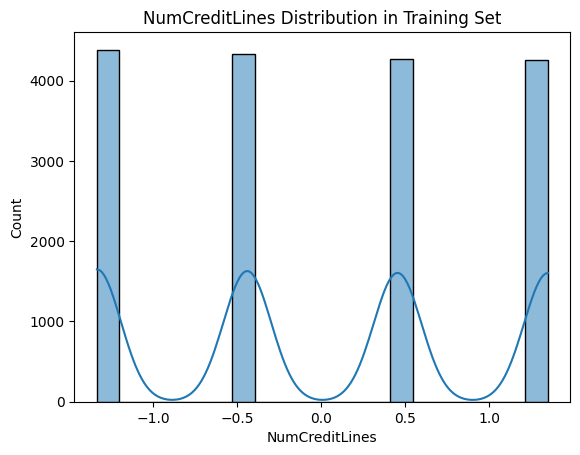

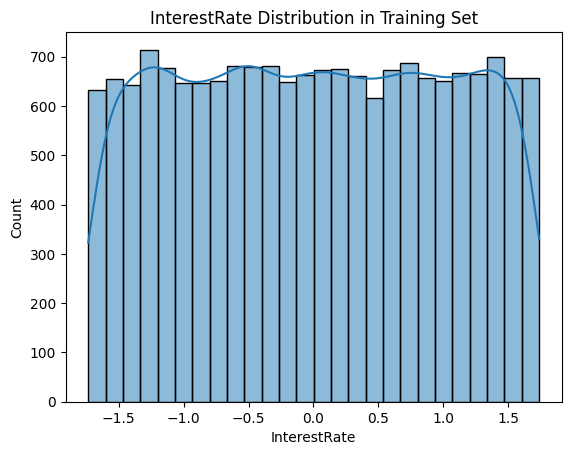

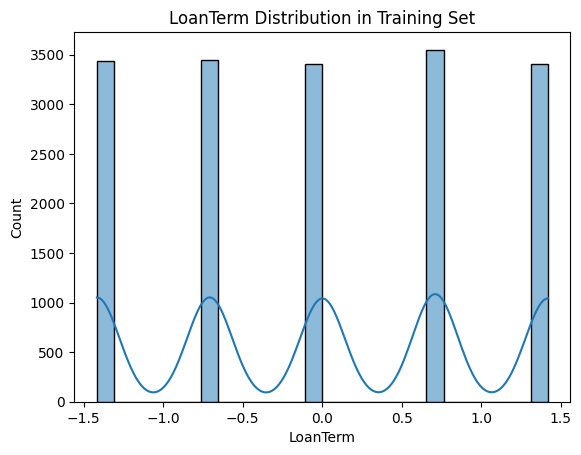

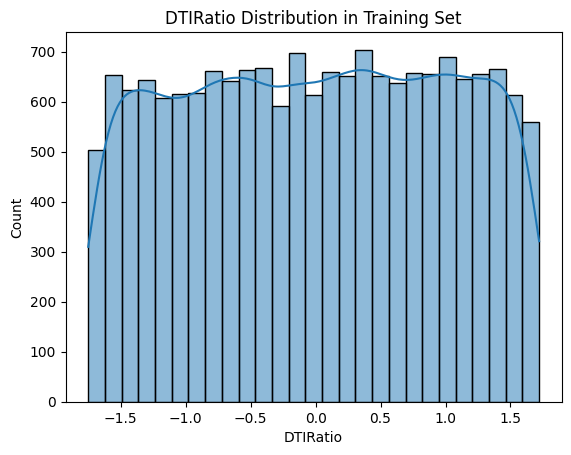

In [31]:


for i in num_cols:
  sns.histplot(X_train[i], kde=True)
  plt.title(f"{i} Distribution in Training Set")
  plt.xlabel(i)
  plt.ylabel("Count")
  plt.show()


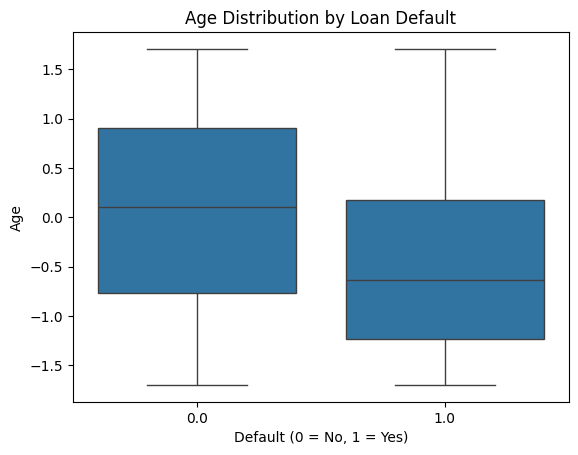

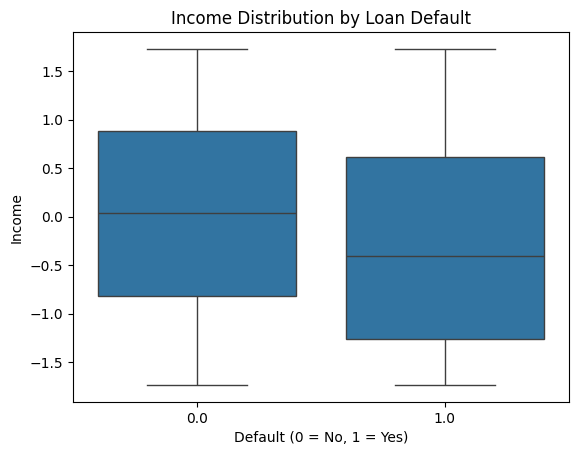

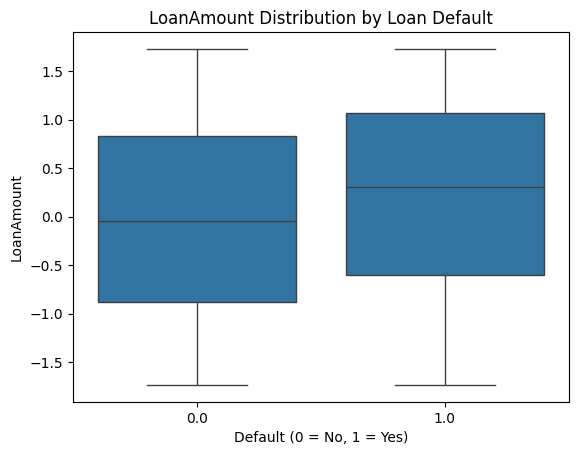

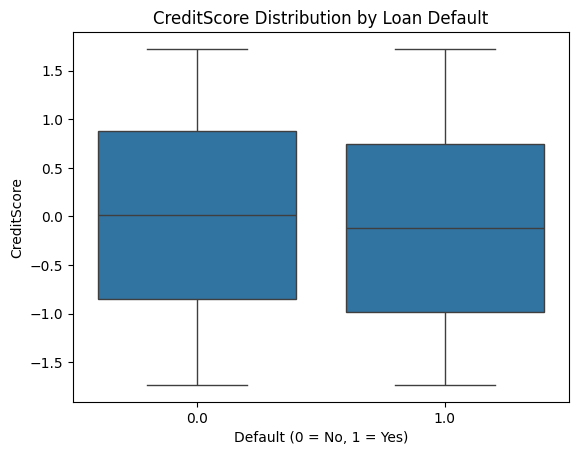

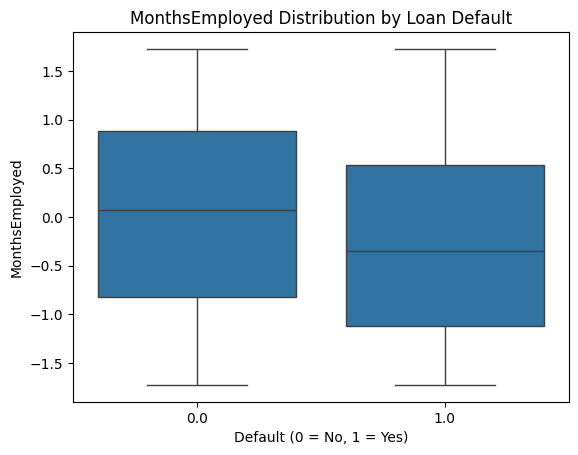

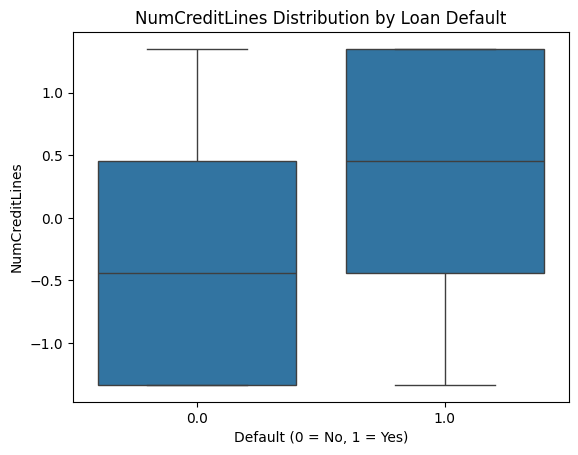

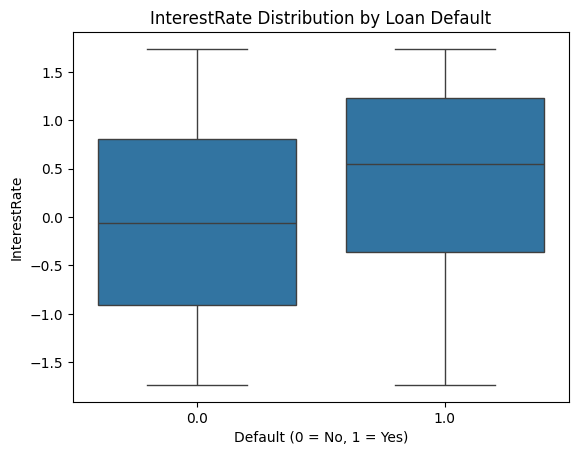

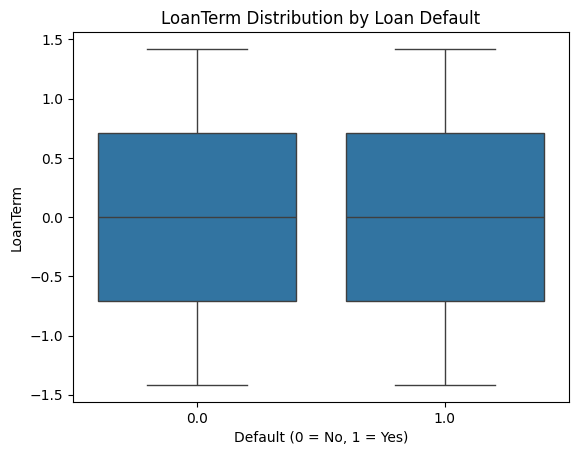

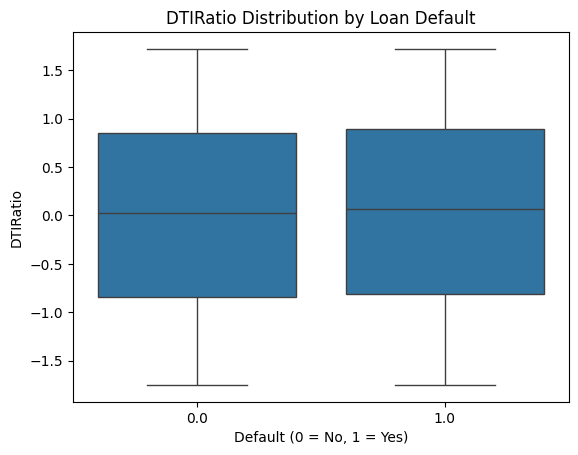

In [33]:
for i in num_cols:
  sns.boxplot(x=Y_train, y=X_train[i])
  plt.title(f'{i} Distribution by Loan Default')
  plt.xlabel("Default (0 = No, 1 = Yes)")
  plt.ylabel(i)
  plt.show()

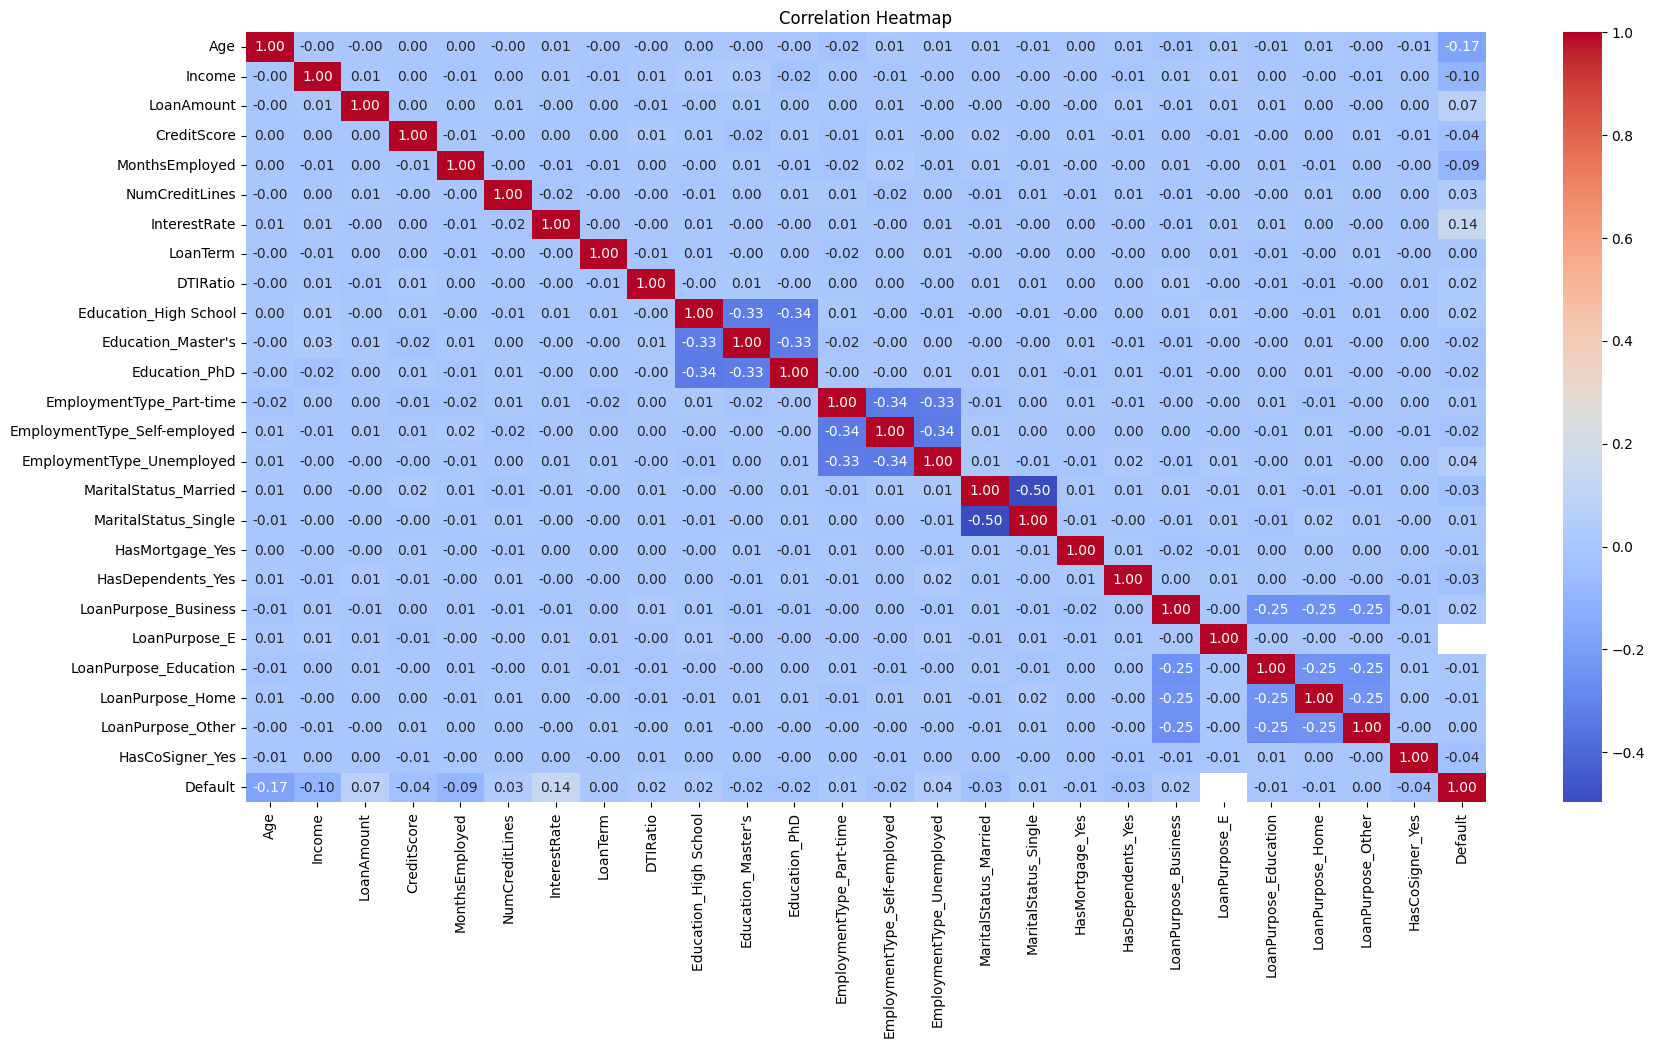

In [40]:
ndf=pd.concat([X_train,Y_train],axis=1)
plt.figure(figsize=(20,10))
sns.heatmap(ndf.corr(),annot=True,cmap='coolwarm',fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [44]:
correlation_with_target = ndf.corr(numeric_only=True)['Default'].sort_values(ascending=False)
print(correlation_with_target)
print('correlation_with_target.min')
print(correlation_with_target.min)

Default                         1.000000
InterestRate                    0.136296
LoanAmount                      0.072013
EmploymentType_Unemployed       0.039539
NumCreditLines                  0.032338
LoanPurpose_Business            0.021535
Education_High School           0.019625
DTIRatio                        0.017008
EmploymentType_Part-time        0.008621
MaritalStatus_Single            0.008389
LoanTerm                        0.004363
LoanPurpose_Other               0.001033
LoanPurpose_Education          -0.005455
HasMortgage_Yes                -0.010393
LoanPurpose_Home               -0.010824
Education_PhD                  -0.015531
Education_Master's             -0.016865
EmploymentType_Self-employed   -0.018609
MaritalStatus_Married          -0.030428
HasDependents_Yes              -0.030628
CreditScore                    -0.037218
HasCoSigner_Yes                -0.037560
MonthsEmployed                 -0.092117
Income                         -0.099199
Age             

In [56]:
#training a model
model=LogisticRegression()
# model.fit(X_train,Y_train)
# model.score(X_train,Y_train)
Y_train.fillna(0, inplace=True)
model.fit(X_train, Y_train)
model.score(X_train, Y_train)


0.8850881261595547

In [57]:

# Predict on training and test sets
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

# Evaluate on training data (to check overfitting)
print("Train Accuracy:", accuracy_score(Y_train, train_preds))

# Evaluate on test data (true evaluation)
print("Test Accuracy:", accuracy_score(Y_test, test_preds))
print("\nClassification Report:\n", classification_report(Y_test, test_preds))

# For binary classification: ROC-AUC
if len(set(Y)) == 2:
    probs = model.predict_proba(X_test)[:,1]
    print("Test ROC-AUC:", roc_auc_score(Y_test, probs))

# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(Y_test, test_preds))



#Class inbalance , y is very unbalance

Train Accuracy: 0.8850881261595547
Test Accuracy: 0.8854625550660793

Classification Report:
               precision    recall  f1-score   support

         0.0       0.89      1.00      0.94      3817
         1.0       0.54      0.03      0.06       496

    accuracy                           0.89      4313
   macro avg       0.71      0.51      0.50      4313
weighted avg       0.85      0.89      0.84      4313

Confusion Matrix:
 [[3804   13]
 [ 481   15]]
